<a href="https://colab.research.google.com/github/gonzoreyes07/Investigaci-n-de-Operaciones/blob/main/Ajuste%20Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial de la librería NetworkX**

# 1. Importación de la librería

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# 2. Grafos Dirigidos (DiGraph)

Un grafo dirigido (nx.DiGraph) es un grafo donde las aristas tienen dirección, representada por flechas.

Creamos un grafo dirigido y añadimos nodos y aristas con un atributo de capacidad (capacity).

In [4]:
G = nx.DiGraph() # Di Graph proporciona metodos y propiedades adicionales

In [57]:
# Agregamos los nodos del problema
G.add_edge("A","B",capacity = 7)
G.add_edge("A","C",capacity = 3)
G.add_edge("B", "C", capacity=7)
G.add_edge("B","D",capacity = 5)
G.add_edge("C","D",capacity = 6)

# Inspección del Grafo

Podemos inspeccionar los nodos, aristas, y sus propiedades:

In [58]:
# Mostrar nodos
print("Nodos:", list(G.nodes()))

Nodos: ['A', 'B', 'C', 'D']


In [59]:
# Mostrar arcos
print("Arcos:", list(G.edges()))

Arcos: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D')]


In [60]:
# Mostrar número de nodos y arcos
print("Número de nodos:", G.number_of_nodes())
print("Número de arcos:", G.number_of_edges())

Número de nodos: 4
Número de arcos: 5


In [61]:
# Mostrar atributos de un arco en específico
print("Atributos del arco A->B:", G["A"]["B"])

Atributos del arco A->B: {'capacity': 7}


# Visualización del Grafo

Para visualizar el grafo, usamos nx.draw_networkx con matplotlib. Añadimos etiquetas y personalizamos el estilo.

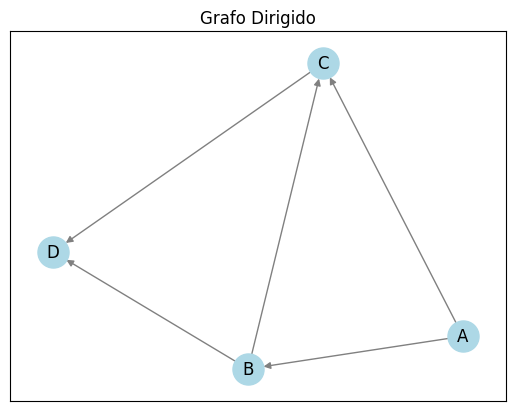

In [62]:
nx.draw_networkx(G, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True, node_size=500, font_size=12)
plt.title("Grafo Dirigido")
plt.show()

# 3. Grafos No Dirigidos (Graph)

Un grafo no dirigido (nx.Graph) no tiene dirección en los arcos. Las conexiones son bidireccionales.

In [63]:
# Ejemplo
# Creamos un grafo no dirigido
UG = nx.Graph()

In [64]:
# Agregamos nodos y arcos
UG.add_nodes_from(["X", "Y", "Z"])
UG.add_edge("X", "Y", weight=1.5)
UG.add_edge("Y", "Z", weight=2.0)
UG.add_edge("Z", "X", weight=1.0)

In [65]:
# Información del grafo creado
print("Nodos del grafo no dirigido:", list(UG.nodes()))
print("Arcos del grafo no dirigido:", list(UG.edges(data=True)))

Nodos del grafo no dirigido: ['X', 'Y', 'Z']
Arcos del grafo no dirigido: [('X', 'Y', {'weight': 1.5}), ('X', 'Z', {'weight': 1.0}), ('Y', 'Z', {'weight': 2.0})]


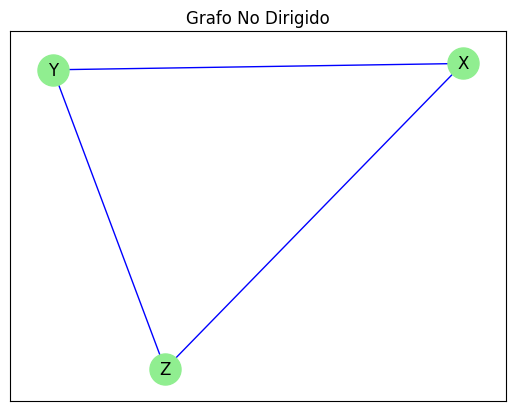

In [66]:
nx.draw_networkx(UG, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=500, font_size=12)
plt.title("Grafo No Dirigido")
plt.show()

# 4. Multigrafos (MultiGraph)

Un multigrafo (nx.MultiGraph) permite múltiples arcos entre el mismo par de nodos, cada una con diferentes atributos.

In [67]:
# Ejemplo:
# Creamos un multigrafo
MG = nx.MultiGraph()

In [68]:
# Agregamos múltiples arcos entre los mismos nodos
MG.add_edge("A", "B", weight=1)
MG.add_edge("A", "B", weight=2)
MG.add_edge("B", "C", weight=3)

0

In [69]:
# Información de nuestro multigrafo creado
print("Aristas del multigrafo:", list(MG.edges(data=True)))

Aristas del multigrafo: [('A', 'B', {'weight': 1}), ('A', 'B', {'weight': 2}), ('B', 'C', {'weight': 3})]


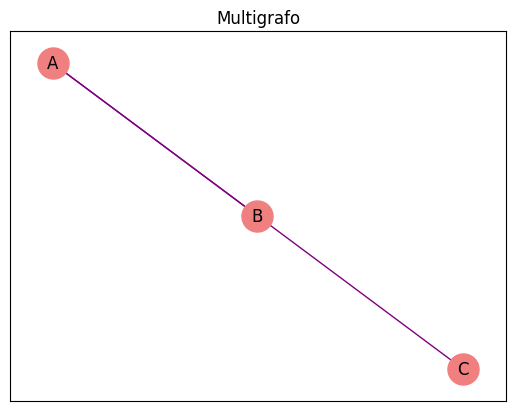

In [70]:
# Visualización
nx.draw_networkx(MG, with_labels=True, node_color='lightcoral', edge_color='purple', node_size=500, font_size=12)
plt.title("Multigrafo")
plt.show()

# **5. Análisis de un Grafo**

NetworkX ofrece herramientas para analizar grafos, como calcular caminos más cortos o el flujo máximo.

In [71]:
# Ejemplo: Camino Más Corto
# Calculamos el camino más corto desde el nodo A al nodo D en el grafo dirigido antes creado.
shortest_path = nx.shortest_path(G, source="A", target="D")
print("Camino más corto de A a D:", shortest_path)

Camino más corto de A a D: ['A', 'B', 'D']


In [72]:
# Ejemplo: Flujo Máximo
# Para el grafo dirigido con capacidades, calculamos el flujo máximo de A a D.
flow_value, flow_dict = nx.maximum_flow(G, "A", "D")
print("Valor del flujo máximo:", flow_value)
print("Distribución del flujo:", flow_dict)

Valor del flujo máximo: 10
Distribución del flujo: {'A': {'B': 7, 'C': 3}, 'B': {'C': 2, 'D': 5}, 'C': {'D': 5}, 'D': {}}


# **5.1 Árbol de expansión mínima**

Es un subgrafo que conecta todos los nodos de un grafo no dirigido con el menor peso total, sin formar ciclos.

In [73]:
# Definimos la función de nuestro árbol de expansión mínima
def arbol_expansion(graph):
    """
    Calcula el árbol de expansión mínima de un grafo no dirigido con pesos.
    Entradas:
        graph: nx.Graph con atributo 'weight' en las aristas.
    Salidas:
        arbol: nx.Graph representando el árbol de expansión mínima.
        peso_total: Suma de los pesos de las aristas en el AEM.
    """
    arbol = nx.minimum_spanning_tree(graph)
    peso_total = sum(data['weight'] for u, v, data in arbol.edges(data=True))
    return arbol, peso_total

Aristas del Árbol: [('X', 'Z', {'weight': 1.0}), ('X', 'Y', {'weight': 1.5})]
Peso total del Árbol: 2.5


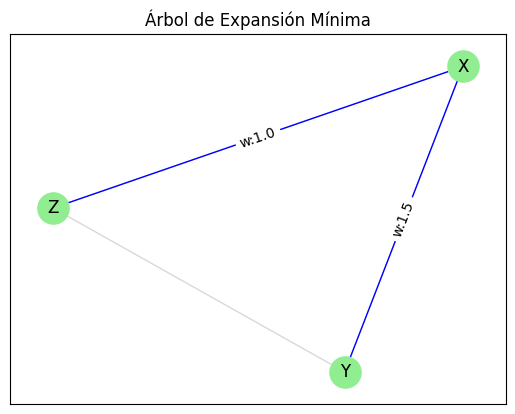

In [74]:
# Calculo del Árbol de Expansión Mínima
arbol, peso_total = arbol_expansion(UG)

print("Aristas del Árbol:", list(arbol.edges(data=True)))
print("Peso total del Árbol:", peso_total)

# Visualización del árbol
pos = nx.spring_layout(UG)
nx.draw_networkx(UG, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500, font_size=12, alpha=0.3)
nx.draw_networkx(arbol, pos, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=500, font_size=12)
nx.draw_networkx_edge_labels(arbol, pos, edge_labels={(u, v): f"w:{d['weight']}" for u, v, d in arbol.edges(data=True)})
plt.title("Árbol de Expansión Mínima")
plt.show()

# **5.2 Ruta Más Corta**

Encuentra el camino de menor costo (según su atributo) entre nodos en un grafo.

In [75]:
# Definimos nuestra función de la ruta más corta
def ruta_corta(graph, source, target, weight='weight'):
    """
    Calcula la ruta más corta entre dos nodos en un grafo.
    Entradas:
        graph: nx.Graph con atributo 'weight' en las aristas.
        source: Nodo de origen.
        target: Nodo de destino.
        weight: Atributo de peso (por defecto 'weight').
    Salidas:
        ruta: Lista de nodos en la ruta más corta.
        longitud: Longitud total de la ruta.
    """
    ruta = nx.shortest_path(graph, source=source, target=target, weight=weight)
    longitud = nx.shortest_path_length(graph, source=source, target=target, weight=weight)
    return ruta, longitud

Ruta más corta de A a D: ['A', 'B', 'D']
Longitud de la ruta: 2


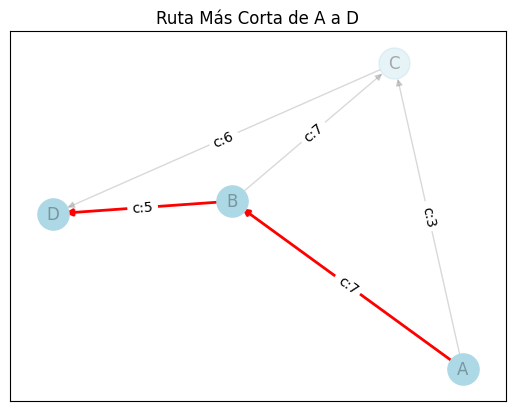

In [76]:
# Calculo de la ruta más corta de A a D
ruta, longitud = ruta_corta(G, source="A", target="D")
print("Ruta más corta de A a D:", ruta)
print("Longitud de la ruta:", longitud)

# Visualización de la ruta
pos = nx.spring_layout(G) # Calcula las posiciones para el grafo G
bordes = list(zip(ruta[:-1], ruta[1:]))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True, node_size=500, font_size=12, alpha=0.3)
nx.draw_networkx_edges(G, pos, edgelist=bordes, edge_color='red', width=2)
nx.draw_networkx_nodes(G, pos, nodelist=ruta, node_color='lightblue', node_size=500)
# Verifica si el atributo "peso" existe para los bordes, antes de agregarle una etiqueta.
etiquetas = {}
for u, v, d in G.edges(data=True):
    if 'weight' in d:
        etiquetas[(u, v)] = f"w:{d['weight']}"
    elif 'capacity' in d:
        etiquetas[(u, v)] = f"c:{d['capacity']}"

nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas)
plt.title("Ruta Más Corta de A a D")
plt.show()

# **5.3 Flujo máximo**
Determina la máxima cantidad de flujo que puede pasar de un nodo fuente a un nodo final en un grafo dirigido con capacidades en las aristas.

In [77]:
def flujo_maximo(graph, source, sink):
    """
    Calcula el flujo máximo en un grafo dirigido con capacidades.
    Entradas:
        graph: nx.DiGraph con atributo 'capacity' en las aristas.
        source: Nodo fuente.
        sink: Nodo final.
    Salidas:
        flow_value: Valor del flujo máximo.
        flow_dict: Diccionario con la distribución del flujo.
    """
    flow_value, flow_dict = nx.flujo_maximo(graph, source, sink, capacity='capacity')
    return flow_value, flow_dict

Valor del flujo máximo: 10
Distribución del flujo: {'A': {'B': 7, 'C': 3}, 'B': {'C': 2, 'D': 5}, 'C': {'D': 5}, 'D': {}}


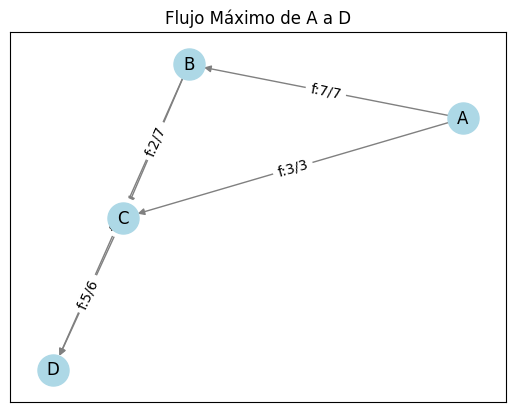

In [78]:
# Calcular flujo máximo de A a D
flow_value, flow_dict = maximum_flow(G, "A", "D")
print("Valor del flujo máximo:", flow_value)
print("Distribución del flujo:", flow_dict)

# Visualización del flujo
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True, node_size=500, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"f:{flow_dict[u][v]}/{d['capacity']}" for u, v, d in G.edges(data=True)})
plt.title("Flujo Máximo de A a D")
plt.show()